In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Case Study - Transaction.csv', delimiter=';')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
df = df.astype({
    'CustomerID': 'category'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   TransactionID  5020 non-null   object  
 1   CustomerID     5020 non-null   category
 2   Date           5020 non-null   object  
 3   ProductID      5020 non-null   object  
 4   Price          5020 non-null   int64   
 5   Qty            5020 non-null   int64   
 6   TotalAmount    5020 non-null   int64   
 7   StoreID        5020 non-null   int64   
dtypes: category(1), int64(4), object(3)
memory usage: 304.1+ KB


In [ ]:
df = df.groupby(['CustomerID']).agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 447 entries, 1 to 447
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionID  447 non-null    int64
 1   Qty            447 non-null    int64
 2   TotalAmount    447 non-null    int64
dtypes: int64(3)
memory usage: 31.0 KB


In [ ]:
X1 = df[['Qty', 'TotalAmount']]
wcss = []
for n in range(1, 11):
  model1 = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=.0001, random_state=100).fit(X1)
  wcss.append(model1.inertia_)

print(wcss)

[6928031854905.469, 2434755239161.558, 1233416628637.202, 776512015459.3008, 504081359168.6173, 382561649380.6708, 277934831850.9972, 212853439355.07407, 171266009033.98712, 137780279242.6316]


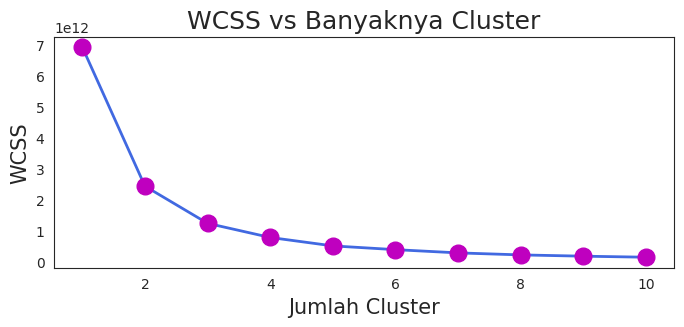

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS vs Banyaknya Cluster', fontsize=18)
plt.xlabel('Jumlah Cluster',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.show()

In [ ]:
model1 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=.0001, random_state=100).fit(X1)
label1 = model1.labels_
centroids1= model1.cluster_centers_
print(label1)
print(centroids1)

[1 0 0 2 2 0 1 1 0 1 2 1 1 0 0 0 0 0 1 1 2 0 1 0 2 2 0 0 0 0 0 0 2 1 2 0 1
 2 0 2 2 0 1 1 1 1 1 0 0 2 0 0 0 0 0 2 0 0 2 0 2 0 1 2 2 0 0 2 0 0 2 1 1 2
 0 1 0 2 2 0 0 0 0 1 0 0 0 1 1 0 2 0 0 2 0 0 0 0 0 2 0 0 0 2 1 1 1 0 2 2 2
 1 2 1 1 0 2 1 0 1 0 2 2 0 2 2 1 2 0 0 1 0 1 0 0 2 0 0 2 0 0 0 2 2 2 2 0 2
 0 1 0 0 2 0 0 1 1 1 0 0 0 0 0 2 0 1 1 0 0 2 1 1 0 0 2 2 0 0 2 2 0 2 2 1 2
 0 1 2 1 0 0 2 2 2 0 2 2 0 1 2 0 0 0 0 2 0 2 2 0 1 0 2 0 0 0 2 1 0 1 2 0 1
 0 2 0 0 2 0 0 2 0 0 1 1 1 0 0 2 0 1 2 2 0 0 1 0 0 2 2 2 2 2 0 0 2 0 0 2 2
 1 2 2 1 1 2 2 0 0 0 1 2 1 0 2 2 1 1 0 0 0 1 1 1 0 2 2 0 0 0 2 2 2 2 2 0 2
 2 0 1 2 1 2 1 0 2 1 0 0 2 0 1 2 2 2 0 2 0 2 0 2 1 0 2 2 2 1 0 2 1 0 2 2 2
 2 0 0 2 2 0 0 0 0 2 2 0 2 0 1 2 0 2 0 0 2 0 1 1 0 2 0 0 0 0 0 1 1 2 2 1 1
 2 0 2 1 2 0 2 0 0 0 2 2 2 1 2 0 2 2 2 2 0 1 0 0 2 2 2 2 2 2 0 2 0 0 2 2 2
 0 0 2 2 2 0 0 0 1 1 2 2 2 2 1 1 1 2 2 1 2 0 1 0 2 0 1 0 0 2 0 2 0 2 2 1 1
 1 0 0]
[[4.23403141e+01 3.78894764e+05]
 [5.77553191e+01 5.44541489e+05]
 [2.95061728e+01 2.3757530

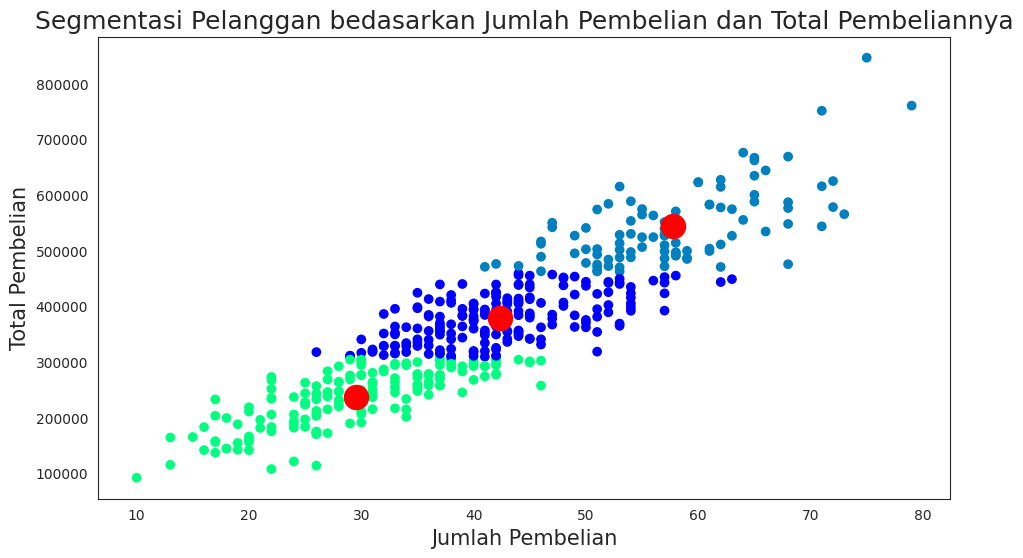

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x='Qty', y='TotalAmount', data=df, c=label1, cmap='winter')
plt.scatter(x= centroids1[:,0], y=centroids1[:,1], s=300, c='red')
plt.xlabel('Jumlah Pembelian', fontsize=15)
plt.ylabel('Total Pembelian', fontsize=15)
plt.title('Segmentasi Pelanggan bedasarkan Jumlah Pembelian dan Total Pembeliannya', fontsize=18)
plt.show()